# Getting started with Python and DataFrames

  In this notebook, we start working with python and explore coding techniques to load and manipulate data. This is important in creating large optimization model, as different CSV datasets may be required to import paramaters for the model.

 What we cover in this Notebook:

1. Creating DataFrames from scratch
2. Read, manipulate, and write DataFrames
3. Grouping columns and aggregation
4. Looping and sorting data


We first need to import packages that include different functions, making our life a bit easier! Pandas and Numpy are two open source tools that contain data manipulation tools and mathematical functions to help us deal with different data. Matplotlib also containts tools to create plots. 

In [9]:
%pip install gurobipy matplotlib numpy pandas


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np

## 0. Very short Python recap

Before we start with DataFrames, let's quickly remind ourselves of a few basic Python concepts:

- Variables
- Basic arithmetic
- Lists and dictionaries
- `for` loops
- The built-in `len` and `type` functions

You don't need to become a Python pro today. The goal is just to be comfortable reading and writing simple code cells.


In [34]:
# Variables and basic arithmetic
a = 5
b = 2
sum_ab = a + b
ratio = a / b

print("a =", a)
print("b =", b)
print("a + b =", sum_ab)
print("a / b =", ratio)

a = 5
b = 2
a + b = 7
a / b = 2.5


In [35]:
# A simple list (e.g. hydrogen demand in 3 periods)
demand = [100, 120, 150]
print("Demand list:", demand)
print("Length of demand:", len(demand))

Demand list: [100, 120, 150]
Length of demand: 3


In [36]:
# A simple dictionary (e.g. fuel prices)
fuel_price = {
    "ng": 25,    # €/MWh
    "electricity": 60
}
print("Fuel prices:", fuel_price)

Fuel prices: {'ng': 25, 'electricity': 60}


In [37]:
# Looping over a list
for t in range(len(demand)):
    print(f"Period {t}: demand = {demand[t]}")

# Checking types
print("Type of demand:", type(demand))
print("Type of fuel_price:", type(fuel_price))

Period 0: demand = 100
Period 1: demand = 120
Period 2: demand = 150
Type of demand: <class 'list'>
Type of fuel_price: <class 'dict'>


### What is a DataFrame
A DataFrame is a data structure that contains rows and columns, which can store the data we need. Let's create a DataFrame from scratch. 

In [38]:
data = {
    "Country": ["Germany", "France", "Netherlands", "Spain"],
    "Production_MW": [250, 180, 150, 220],
    "Cost_per_MWh": [45, 50, 48, 47],
}

df = pd.DataFrame(data)

df


,Country,Production_MW,Cost_per_MWh
0,Germany,250,45
1,France,180,50
2,Netherlands,150,48
3,Spain,220,47


We can get some information about our dataframe with a simple line of code.

In [39]:
df.info()

df.describe()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        4 non-null      object
 1   Production_MW  4 non-null      int64 
 2   Cost_per_MWh   4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


,Country,Production_MW,Cost_per_MWh
0,Germany,250,45
1,France,180,50
2,Netherlands,150,48
3,Spain,220,47


We created a DataFrame from scratch. But we also can read data from excel or CSV files. 

In [40]:
# Save to CSV (we’ll use this later)
df.to_csv("Input_Data/energy_data.csv", index=False)

# Read it back
df_csv = pd.read_csv("Input_Data/Powe_Gen_Data.csv")
df_csv.head()
#df_csv.info()

,Resource,r_id,Zone,Gen_type,Stor_type,Existing_cap,Inv_cost_per_MWyr,FOM_cost_per_MWyr,VOM_cost_MWh,Heat_Rate_MMBTU_per_MWh,Fuel,Ramp_up,Ramp_dn,h2_demand_tonne_p_MWh
0,GasTurbine_1,1,1,1,0,1444,61642,18965,5.98,10.00,ng,1.0,1.0,0.0
1,Coal_PowerPlant_1,2,1,1,0,748,187572,61465,7.19,9.75,coal,0.6,0.6,0.0
2,Biomass_1,3,1,1,0,920,158442,53200,4.69,13.50,biomass,1.0,1.0,0.0
3,GroundBasedPV_1,4,1,2,0,957,40172,11003,0.00,0.00,none,1.0,1.0,0.0
4,RoofPV_1,5,1,2,0,360,60226,13244,0.00,0.00,none,1.0,1.0,0.0


You can now select an specific column in the df_csv DataFrame.

In [41]:
df_csv["Resource"] # selecting a specific column
df_csv[["Resource", "Existing_cap"]] # selecting multiple columns

df_csv[df_csv["Fuel"] == "ng"]  # filtering rows
df_csv[df_csv["Existing_cap"] > 1]  # filtering rows with condition

,Resource,r_id,Zone,Gen_type,Stor_type,Existing_cap,Inv_cost_per_MWyr,FOM_cost_per_MWyr,VOM_cost_MWh,Heat_Rate_MMBTU_per_MWh,Fuel,Ramp_up,Ramp_dn,h2_demand_tonne_p_MWh
0,GasTurbine_1,1,1,1,0,1444,61642,18965,5.98,10.00,ng,1.0,1.0,0.00
1,Coal_PowerPlant_1,2,1,1,0,748,187572,61465,7.19,9.75,coal,0.6,0.6,0.00
2,Biomass_1,3,1,1,0,920,158442,53200,4.69,13.50,biomass,1.0,1.0,0.00
3,GroundBasedPV_1,4,1,2,0,957,40172,11003,0.00,0.00,none,1.0,1.0,0.00
4,RoofPV_1,5,1,2,0,360,60226,13244,0.00,0.00,none,1.0,1.0,0.00
5,Onshore_WT_1,6,1,2,0,868,71145,21770,0.00,0.00,none,1.0,1.0,0.00
6,Fuel_Cell_1,7,1,2,0,213,52914,36500,0.66,0.00,hydrogen,1.0,1.0,0.06
7,GasTurbine_2,8,2,1,0,144,61642,18965,5.98,10.00,ng,1.0,1.0,0.00
8,Coal_PowerPlant_2,9,2,1,0,1800,187572,61465,7.19,9.75,coal,0.6,0.6,0.00
9,Biomass_2,10,2,1,0,332,158442,53200,4.69,13.50,biomass,1.0,1.0,0.00


You can select a specific subset of the DataFrame

In [42]:
Not_NG = df_csv[df_csv["Fuel"] != "ng"]  # Only selects generators that do not use natural gas as the fuel

Not_NG


,Resource,r_id,Zone,Gen_type,Stor_type,Existing_cap,Inv_cost_per_MWyr,FOM_cost_per_MWyr,VOM_cost_MWh,Heat_Rate_MMBTU_per_MWh,Fuel,Ramp_up,Ramp_dn,h2_demand_tonne_p_MWh
1,Coal_PowerPlant_1,2,1,1,0,748,187572,61465,7.19,9.75,coal,0.6,0.6,0.00
2,Biomass_1,3,1,1,0,920,158442,53200,4.69,13.50,biomass,1.0,1.0,0.00
3,GroundBasedPV_1,4,1,2,0,957,40172,11003,0.00,0.00,none,1.0,1.0,0.00
4,RoofPV_1,5,1,2,0,360,60226,13244,0.00,0.00,none,1.0,1.0,0.00
5,Onshore_WT_1,6,1,2,0,868,71145,21770,0.00,0.00,none,1.0,1.0,0.00
6,Fuel_Cell_1,7,1,2,0,213,52914,36500,0.66,0.00,hydrogen,1.0,1.0,0.06
8,Coal_PowerPlant_2,9,2,1,0,1800,187572,61465,7.19,9.75,coal,0.6,0.6,0.00
9,Biomass_2,10,2,1,0,332,158442,53200,4.69,13.50,biomass,1.0,1.0,0.00
10,GroundBasedPV_2,11,2,2,0,289,40172,11003,0.00,0.00,none,1.0,1.0,0.00
11,RoofPV_2,12,2,2,0,448,60226,13244,0.00,0.00,none,1.0,1.0,0.00


If you need to pick a specific data from the DataFrame you can point to it. For example, let's find out what is the fuel type of Fuel_Cell_1 as a generator:

In [43]:
Selected_Data = df_csv.loc[df_csv["Resource"] == "Fuel_Cell_1", "Fuel"].values[0]

Selected_Data

'hydrogen'

### Sorting data

We can sort our DataFrame by a specific column. For example, we might want to see which generators have the largest existing capacity.


In [44]:
# Sort generators by existing capacity (descending)
df_sorted = df_csv.sort_values(by="Existing_cap", ascending=False)

# Show top 5
df_sorted[["Resource", "Fuel", "Existing_cap"]].head()


,Resource,Fuel,Existing_cap
8,Coal_PowerPlant_2,coal,1800
0,GasTurbine_1,ng,1444
3,GroundBasedPV_1,none,957
17,GroundBasedPV_3,none,944
2,Biomass_1,biomass,920


### Grouping and aggregation

A very useful operation is to group rows by some category (e.g., fuel type) and then compute aggregated values such as sums or averages.


In [45]:
# Total existing capacity by fuel type
capacity_by_fuel = (
    df_csv.groupby("Fuel")["Existing_cap"].sum().reset_index()
)

capacity_by_fuel


,Fuel,Existing_cap
0,biomass,1486
1,coal,2548
2,hydrogen,1096
3,ng,1774
4,none,6305


### A quick plot

We can also visualize the aggregated results with a simple bar plot.


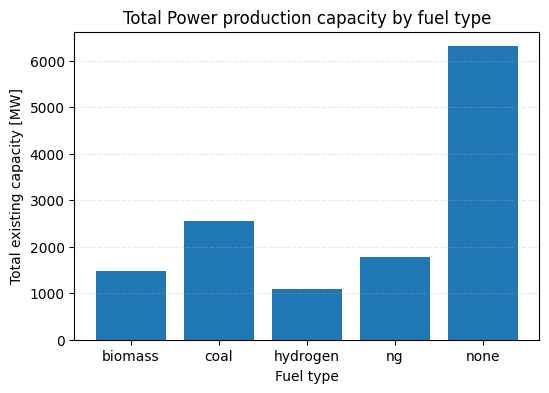

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(capacity_by_fuel["Fuel"], capacity_by_fuel["Existing_cap"])
plt.xlabel("Fuel type")
plt.ylabel("Total existing capacity [MW]")
plt.title("Total Power production capacity by fuel type")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()


We can add new columns to our DataFrames:

In [50]:
df_csv["Inflated_inv_Cost"] = df_csv["Inv_cost_per_MWyr"] * 1.23

df_csv[["Inv_cost_per_MWyr","Inflated_inv_Cost"]]


,Inv_cost_per_MWyr,Inflated_inv_Cost
0,61642,75819.66
1,187572,230713.56
2,158442,194883.66
3,40172,49411.56
4,60226,74077.98
5,71145,87508.35
6,52914,65084.22
7,61642,75819.66
8,187572,230713.56
9,158442,194883.66


Offcourse we can also delete a certain column:

In [51]:
df_csv.drop(columns=["Inflated_inv_Cost"], inplace=True)

We can rename a certain column header with the following command:

In [52]:
df_csv = df_csv.rename(columns={"Existing_cap": "Existing_cap_MW", "Fuel": "Fuel_Type"})
df_csv.head()

,Resource,r_id,Zone,Gen_type,Stor_type,Existing_cap_MW,Inv_cost_per_MWyr,FOM_cost_per_MWyr,VOM_cost_MWh,Heat_Rate_MMBTU_per_MWh,Fuel_Type,Ramp_up,Ramp_dn,h2_demand_tonne_p_MWh
0,GasTurbine_1,1,1,1,0,1444,61642,18965,5.98,10.00,ng,1.0,1.0,0.0
1,Coal_PowerPlant_1,2,1,1,0,748,187572,61465,7.19,9.75,coal,0.6,0.6,0.0
2,Biomass_1,3,1,1,0,920,158442,53200,4.69,13.50,biomass,1.0,1.0,0.0
3,GroundBasedPV_1,4,1,2,0,957,40172,11003,0.00,0.00,none,1.0,1.0,0.0
4,RoofPV_1,5,1,2,0,360,60226,13244,0.00,0.00,none,1.0,1.0,0.0


We can group different rows with the same characteristic. For example, if we want to have the capacity of all hydrogen generators, we can use the following code:

In [55]:
df_existing_Cap = df_csv.groupby("Gen_type")["Existing_cap_MW"].sum()

df_existing_Cap

Gen_type
1    5808
2    7401
Name: Existing_cap_MW, dtype: int64

You can use a loop to print the details of a certain group.

In [56]:
for name, group in df_existing_Cap.items():
    print(f"Group: {name}")
    print(group)

Group: 1
5808
Group: 2
7401


You can sort the DataFrame by descending/ascending order of a specific column   

In [57]:
df_sorted = df_csv.sort_values(by="Existing_cap_MW", ascending=False)
df_sorted


,Resource,r_id,Zone,Gen_type,Stor_type,Existing_cap_MW,Inv_cost_per_MWyr,FOM_cost_per_MWyr,VOM_cost_MWh,Heat_Rate_MMBTU_per_MWh,Fuel_Type,Ramp_up,Ramp_dn,h2_demand_tonne_p_MWh
8,Coal_PowerPlant_2,9,2,1,0,1800,187572,61465,7.19,9.75,coal,0.6,0.6,0.00
0,GasTurbine_1,1,1,1,0,1444,61642,18965,5.98,10.00,ng,1.0,1.0,0.00
3,GroundBasedPV_1,4,1,2,0,957,40172,11003,0.00,0.00,none,1.0,1.0,0.00
17,GroundBasedPV_3,18,3,2,0,944,40172,11003,0.00,0.00,none,1.0,1.0,0.00
2,Biomass_1,3,1,1,0,920,158442,53200,4.69,13.50,biomass,1.0,1.0,0.00
20,Fuel_Cell_3,21,3,2,0,883,52914,36500,0.66,0.00,hydrogen,1.0,1.0,0.06
5,Onshore_WT_1,6,1,2,0,868,71145,21770,0.00,0.00,none,1.0,1.0,0.00
25,RoofPV_4,26,4,2,0,791,60226,13244,0.00,0.00,none,1.0,1.0,0.00
1,Coal_PowerPlant_1,2,1,1,0,748,187572,61465,7.19,9.75,coal,0.6,0.6,0.00
12,Onshore_WT_2,13,2,2,0,619,71145,21770,0.00,0.00,none,1.0,1.0,0.00


Finally, you can write the updated DataFrame into a csv file

In [ ]:
df_csv.to_csv("Input_Data/Pow_Gen_Data_modified.csv", index=False)
print("✅ Data written to Input_Data/HSC_Gen_Data_modified.csv")

✅ Data written to Input_Data/HSC_Gen_Data_modified.csv


### Important Note

For our next session, we will be working on a simple optimization Problem. Therefore we need to install a solver so it can optimize our model for us. The easiest and most compatible solver to Python is Gurobi. However, you need to have a liesence to use Gurobi, which you can obtain with an academic email.

Go to [Gurobi Website](https://www.gurobi.com/downloads/gurobi-software/) and install Gurobi on your system. After creating a profile with your email, go to [Request](https://portal.gurobi.com/iam/licenses/request) section, get a Named-User Academic liesence and follow the instruction to install in on your own computer.

# Exercise 1

Load the data stored in the file Ex01.csv into a dataframe called zones. Specify the data type of the columns 'Zone_code' and 'Available_Land' in the dataset? Get the dimentions of the zones DataFrame.

# write your code here

# Exercise 2

Rename the 'H2_Curtail_cost' column into 'Hydrogen_Curtailment_Cost' and set the values of hydrogen curtailment cost on the zones 4 and 7 to 5000.


In [1]:
# write your code here

# Exercise 3

Increase the Emission_cost on each zone by 50%

In [ ]:
# write your code here